## 6.4 Task

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

## 1. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [39]:
DF = pd.read_csv(r'/Users/winsontom/Desktop/Career Foundry/Final CF Immersion/02 Data/4.0 Cleaned further.csv')

## Data Cleaning

In [40]:
DF.head()

,Address,Borough,Property Type,Bedrooms,Bathrooms,Price,Square Footage,Price Per Square Feet,Exact Address,Neighborhood,County,Zipcode,Brokerage
0,2 E 55th St Unit 803,Manhattan,Condo,2,2,315000,1400,225.00,"Regis Residence, 2 E 55th St #803, New York, N...",New York,New York County,10022,Douglas Elliman -111 Fifth Ave
1,Central Park Tower Penthouse-217 W 57th St Un...,Manhattan,Condo,7,10,195000000,17545,11114.28,"217 W 57th St, New York, NY 10019, USA",New York,New York County,10019,Serhant
2,620 Sinclair Ave,Staten Island,House,4,2,260000,2015,129.03,"620 Sinclair Ave, Staten Island, NY 10312, USA",Staten Island,Richmond County,10312,Sowae Corp
3,2 E 55th St Unit 908W33,Manhattan,Condo,3,1,69000,445,155.06,"2 E 55th St, New York, NY 10022, USA",New York,New York County,10022,COMPASS
4,5 E 64th St,Manhattan,Townhouse,7,2,55000000,14175,3880.07,"5 E 64th St, New York, NY 10065, USA",New York,New York County,10065,Sotheby's International Realty - East Side Ma...


In [41]:
DF.columns

Index(['Address', 'Borough', 'Property Type', 'Bedrooms', 'Bathrooms', 'Price',
       'Square Footage', 'Price Per Square Feet', 'Exact Address',
       'Neighborhood', 'County', 'Zipcode', 'Brokerage'],
      dtype='object')

In [42]:
DF.shape

(4552, 13)

In [43]:
#Cleaned out any missing values

DF.isnull().sum()

Address                  0
Borough                  0
Property Type            0
Bedrooms                 0
Bathrooms                0
Price                    0
Square Footage           0
Price Per Square Feet    0
Exact Address            0
Neighborhood             0
County                   0
Zipcode                  0
Brokerage                0
dtype: int64

In [44]:
DF.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4547    False
4548    False
4549    False
4550    False
4551    False
Length: 4552, dtype: bool

/var/folders/yj/v30db1v90zs0p0pvttp796cm0000gp/T/ipykernel_76111/1757314254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DF['Price Per Square Feet'], bins=30) # Shows extreme values
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/winsontom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf value

<Axes: xlabel='Price Per Square Feet', ylabel='Density'>

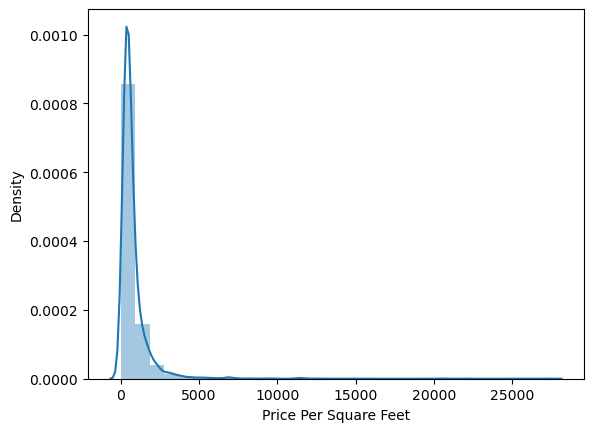

In [45]:
sns.distplot(DF['Price Per Square Feet'], bins=30) # Shows extreme values

In [46]:
#Average price per square foot for ALL properties
# $780.20 dollars

DF['Price Per Square Feet'].mean()

780.2086401581721

In [47]:
#Median price per square feet
# $492.13 dollars, much smaller than the mean amount

DF['Price Per Square Feet'].median()

492.125

In [48]:
#Max price per square feet
#Most expensive price per square feet
# $27,472.53 per square feet

DF['Price Per Square Feet'].max()

27472.53

## 3. Data prep for regression analysis

In [ ]:
#Making Scatter Plot

In [ ]:
#X variable - independant variable - 'Square Footage'
#Y variable - dependant variable - 'Price'

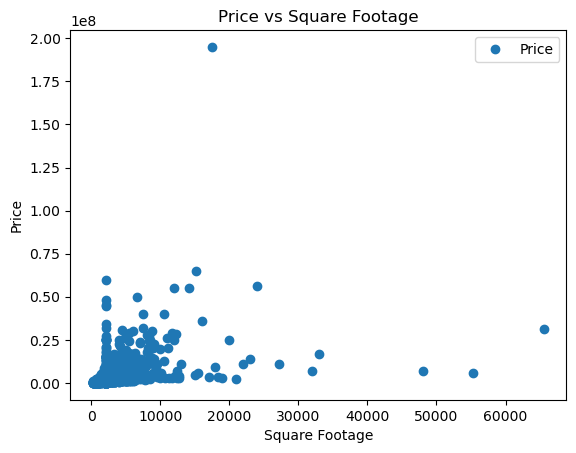

In [51]:
#Small positive relationship
#As Square Footage goes up, prices go up (some times), we will find out more on how much it effects

DF.plot(x = 'Square Footage', y='Price', style='o') 
plt.title('Price vs Square Footage')  
plt.xlabel('Square Footage')  
plt.ylabel('Price')  
plt.show()

In [53]:
X = DF['Square Footage'].values.reshape(-1,1)
y = DF['Price'].values.reshape(-1,1)

In [54]:
X

array([[ 1400],
       [17545],
       [ 2015],
       ...,
       [ 2184],
       [  655],
       [  750]])

In [56]:
y

array([[   315000],
       [195000000],
       [   260000],
       ...,
       [  1275000],
       [   598125],
       [   349000]])

In [57]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis - Test Set

In [59]:
regression = LinearRegression()

In [60]:
regression.fit(X_train, y_train)

LinearRegression()

In [61]:
y_predicted = regression.predict(X_test)

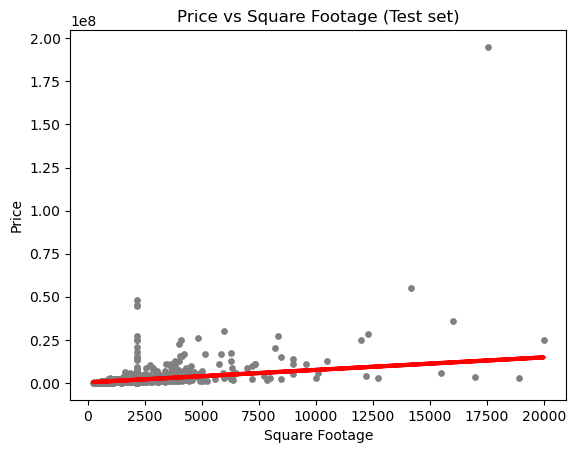

In [62]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Square Footage (Test set)')
plot_test.xlabel('Square Footage')
plot_test.ylabel('Price')
plot_test.show()

In [63]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[727.52977267]]
Mean squared error:  38225184152381.09
R2 score:  0.14730221234990615


In [ ]:
#Slope Makes sense as it is almost the same # as the Price per Square Foot mean
#Slope says as the square footage increases by 1 , the price increases by $727. 
#Similarly the prime per square foot mean is $780, meaning on average 1 more square foot is $780.

#Mean Squared Error of 38,225,184,152,381.09 is huge indicating the regression line is not close to the points.
#This tells us there is a poor relationship between increase in square footage as there is an increase in price.
#It is not as simple as big home is more expensive home as one may assume

#R2 scores range from 0-1, with closer to 1 having a strong correlation
#The R2 score here is 0.15 , when rounded up. This is a "15%" which shows the relationship is not strong.



In [64]:
y_predicted

array([[1867166.40974696],
       [1867166.40974696],
       [1867166.40974696],
       ...,
       [3079231.0110098 ],
       [1045057.7666335 ],
       [1867166.40974696]])

In [65]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(50)

,Actual,Predicted
0,1780000,1.867166e+06
1,650000,1.867166e+06
2,1528000,1.867166e+06
3,825000,1.296783e+06
4,1650000,1.587795e+06
5,349980,1.867166e+06
6,799900,1.599435e+06
7,668888,1.867166e+06
8,199000,1.867166e+06
9,369000,9.330182e+05


## 4. Regression Analysis - Train Set

In [66]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [67]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [68]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[727.52977267]]
Mean squared error:  13153969986496.396
R2 score:  0.19934922551917722


In [ ]:
#Slightly better R2 score when using set, but ultimately still low as it is from 0-1.

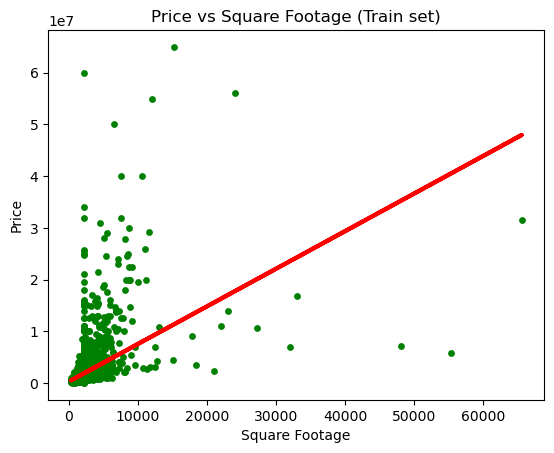

In [69]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Square Footage (Train set)')
plot_test.xlabel('Square Footage')
plot_test.ylabel('Price')
plot_test.show()

In [ ]:
#Slope from Train set is  the same as Test set


#Mean Squared Error still extremely high indicating there is a poor relationship 

#Slightly greater R2 score, not much difference though.

#Can conclude there is very minor correlation that as square footage increases price increases. 
#Size is not the primary determination of the Price.

